# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## You model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [100]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
df.shape

(1460, 81)

In [101]:
#numeric columns only
df = df.select_dtypes(np.number)
df.shape

(1460, 38)

In [102]:
df.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000


In [103]:
df.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [104]:
df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [105]:
#drop columns with nulls
df = df.drop(columns = ['GarageYrBlt', 'LotFrontage', 'MasVnrArea'])
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [106]:
pd.set_option('display.max_columns', 100)
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
#drop less relevant room columns (we have TotRmsAbvGrd) and misc simple counts
df['bathrooms'] = df.FullBath + (df.HalfBath/2) #1
df['has_fireplace'] = df.Fireplaces != 0 #2
df['has_fireplace'] = df.has_fireplace.astype(int)
df = df.drop(columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                        'KitchenAbvGr', 'Fireplaces', 'GarageCars'])

#drop square footage for combinable features
df['haspool'] = df.PoolArea != 0 #3
df['haspool'] = df.haspool.astype(int)
df['decksqrft'] = df.WoodDeckSF + df.OpenPorchSF + df.EnclosedPorch + df['3SsnPorch'] + df.ScreenPorch #4
df['hasdeck'] = df.decksqrft != 0 #5
df['hasdeck'] = df.hasdeck.astype(int)
df = df.drop(columns = ['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
                        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                        'ScreenPorch', 'PoolArea', 'MiscVal', '1stFlrSF',
                        '2ndFlrSF'])

In [108]:
#rename features
df = df.rename(columns = {'GrLivArea':'insidesqrft', 'GarageArea':'garagesqrft', 
                          'TotalBsmtSF':'basementsqrft', 'LotArea':'lotsqrft', 'BedroomAbvGr':'bedrooms',
                          'TotRmsAbvGrd':'totalrooms'})
df.columns

Index(['Id', 'MSSubClass', 'lotsqrft', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'basementsqrft', 'insidesqrft', 'bedrooms',
       'totalrooms', 'garagesqrft', 'MoSold', 'YrSold', 'SalePrice',
       'bathrooms', 'has_fireplace', 'haspool', 'decksqrft', 'hasdeck'],
      dtype='object')

In [111]:
#make and drop more features
df['years_since_major_model'] = 2010 - df.YearRemodAdd #6
df['sqrft_per_room'] = df.insidesqrft / df.totalrooms #7
df['total_sqrft'] = df.insidesqrft + df.decksqrft + df.garagesqrft + df.lotsqrft #8
df['total_building_sqrft'] = df.insidesqrft + df.decksqrft + df.garagesqrft #9
df['years_since_major_model_when_bought'] = df.YrSold - df.YearRemodAdd #10
df = df.drop(columns = ['YearBuilt', 'YearRemodAdd', 'MSSubClass', 'Id'])
df.columns

Index(['lotsqrft', 'OverallQual', 'OverallCond', 'basementsqrft',
       'insidesqrft', 'bedrooms', 'totalrooms', 'garagesqrft', 'MoSold',
       'YrSold', 'SalePrice', 'bathrooms', 'has_fireplace', 'haspool',
       'decksqrft', 'hasdeck', 'years_since_major_model', 'sqrft_per_room',
       'total_sqrft', 'total_building_sqrft',
       'years_since_major_model_when_bought'],
      dtype='object')

In [0]:
#polynomial features - square years_since_major_model and all sqrft
df['years_squared'] = df.years_since_major_model ** 2
df['lotsqrft_squared'] = df.lotsqrft ** 2
df['insidesqrft_squared'] = df.lotsqrft ** 2
df['decksqrft_squared'] = df.decksqrft **2
df['garagesqrft_squared'] = df.garagesqrft ** 2
df['total_sqrft_squared'] = df.total_sqrft ** 2
df['total_building_sqrft_squared'] = df.total_building_sqrft ** 2
df['sqrft_per_room_squared'] = df.sqrft_per_room ** 2

In [0]:
#interaction feature -  insidesqrft and sqrftperroomsquared
df['interaction_inside'] = df.insidesqrft * df.sqrft_per_room
df['interaction_inside_squared'] = df.insidesqrft_squared * df.sqrft_per_room_squared

In [115]:
df.shape

(1460, 31)

In [116]:
df.describe()

,lotsqrft,OverallQual,OverallCond,basementsqrft,insidesqrft,bedrooms,totalrooms,garagesqrft,MoSold,YrSold,SalePrice,bathrooms,has_fireplace,haspool,decksqrft,hasdeck,years_since_major_model,sqrft_per_room,total_sqrft,total_building_sqrft,years_since_major_model_when_bought,years_squared,lotsqrft_squared,insidesqrft_squared,decksqrft_squared,garagesqrft_squared,total_sqrft_squared,total_building_sqrft_squared,sqrft_per_room_squared,interaction_inside,interaction_inside_squared
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1460.000000,1.460000e+03,1.460000e+03
mean,10516.828082,6.099315,5.575342,1057.429452,1515.463699,2.866438,6.517808,472.980137,6.321918,2007.815753,180921.195890,1.756507,0.527397,0.004795,181.329452,0.826027,25.134247,230.905362,12686.60137,2169.773288,22.950000,1057.671233,2.101611e+08,2.101611e+08,5.740469e+04,2.693914e+05,2.651454e+08,5.239441e+06,55317.618097,3.652896e+05,1.499677e+13
std,9981.264932,1.382997,1.112799,438.705324,525.480383,0.815778,1.625393,213.804841,2.703626,1.328095,79442.502883,0.636015,0.499420,0.069100,156.656097,0.379216,20.645407,44.740397,10211.11761,729.307363,20.640653,1286.124639,1.607110e+09,1.607110e+09,9.250344e+04,2.242881e+05,1.658055e+09,3.885872e+06,22558.847545,1.957317e+05,1.233322e+14
min,1300.000000,1.000000,1.000000,0.000000,334.000000,0.000000,2.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,2163.00000,334.000000,-1.000000,0.000000,1.690000e+06,1.690000e+06,0.000000e+00,0.000000e+00,4.678569e+06,1.115560e+05,14400.000000,5.577800e+04,8.545098e+10
25%,7553.500000,5.000000,5.000000,795.750000,1129.500000,2.000000,5.000000,334.500000,5.000000,2007.000000,129975.000000,1.000000,0.000000,0.000000,45.000000,1.000000,6.000000,199.000000,9392.50000,1664.750000,4.000000,36.000000,5.705542e+07,5.705542e+07,2.025000e+03,1.118970e+05,8.821908e+07,2.771393e+06,39601.000000,2.324493e+05,2.387772e+12
50%,9478.500000,6.000000,5.000000,991.500000,1464.000000,3.000000,6.000000,480.000000,6.000000,2008.000000,163000.000000,2.000000,1.000000,0.000000,164.000000,1.000000,16.000000,226.500000,11543.00000,2075.000000,14.000000,256.000000,8.984196e+07,8.984196e+07,2.689600e+04,2.304000e+05,1.332409e+08,4.305625e+06,51302.250000,3.329280e+05,4.380371e+12
75%,11601.500000,7.000000,6.000000,1298.250000,1776.750000,3.000000,7.000000,576.000000,8.000000,2009.000000,214000.000000,2.500000,1.000000,0.000000,266.000000,1.000000,43.000000,256.107143,14124.00000,2572.500000,41.000000,1849.000000,1.345948e+08,1.345948e+08,7.075600e+04,3.317760e+05,1.994874e+08,6.617757e+06,65590.903061,4.508356e+05,7.717160e+12
max,215245.000000,10.000000,9.000000,6110.000000,5642.000000,8.000000,14.000000,1418.000000,12.000000,2010.000000,755000.000000,3.500000,1.000000,1.000000,1027.000000,1.000000,60.000000,470.166667,217794.00000,7566.000000,60.000000,3600.000000,4.633041e+10,4.633041e+10,1.054729e+06,2.010724e+06,4.743423e+10,5.724436e+07,221056.694444,2.652680e+06,3.000832e+15


In [125]:
for label, col in df.iteritems():
  Q1 = col.quantile(0.25)
  Q3 = col.quantile(0.75)
  IQR = Q3 - Q1
  filtered = df[((Q1 -(IQR*1.5)) <= col) & (col <= (Q3 +(IQR*1.5)))]
filtered.shape
#wait...how would you remove outliers in a way that doesn't make the df swiss cheese?

(1338, 31)

In [140]:
df.columns

Index(['lotsqrft', 'OverallQual', 'OverallCond', 'basementsqrft',
       'insidesqrft', 'bedrooms', 'totalrooms', 'garagesqrft', 'MoSold',
       'YrSold', 'SalePrice', 'bathrooms', 'has_fireplace', 'haspool',
       'decksqrft', 'hasdeck', 'years_since_major_model', 'sqrft_per_room',
       'total_sqrft', 'total_building_sqrft',
       'years_since_major_model_when_bought', 'years_squared',
       'lotsqrft_squared', 'insidesqrft_squared', 'decksqrft_squared',
       'garagesqrft_squared', 'total_sqrft_squared',
       'total_building_sqrft_squared', 'sqrft_per_room_squared',
       'interaction_inside', 'interaction_inside_squared', 'SalePrice_log'],
      dtype='object')

In [0]:
#y = SalePrice
df['SalePrice_log'] = np.log(df.SalePrice)
Xlabels = df.columns.drop('SalePrice_log')

In [127]:
Xlabels.shape

(31,)

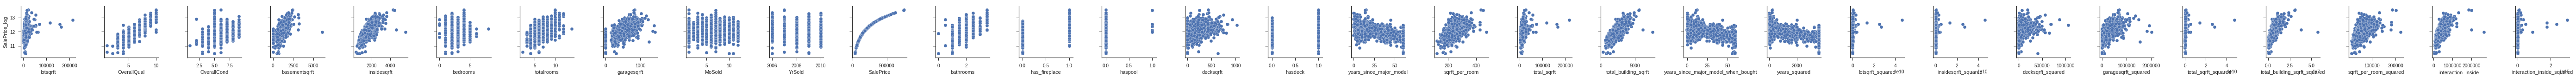

In [128]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=df, y_vars=['SalePrice_log'], x_vars=Xlabels)
#interesting that age, age squared and age when bought have almost identical plots (and curvaceous)

In [0]:
X = df.drop(columns = ['SalePrice', 'SalePrice_log']).values

In [139]:
y = df.loc[:, ['SalePrice_log']].values
y.shape

(1460, 1)

In [144]:
X.shape

(1460, 30)

In [145]:
from sklearn.model_selection import train_test_split
model = LinearRegression()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.5, random_state=42)
model.fit(Xtrain, ytrain)

from sklearn.linear_model import LinearRegression
prediction = model.predict(Xtest)

from sklearn.metrics import mean_squared_error, r2_score
RMSE = (np.sqrt(mean_squared_error(ytest, prediction)))
Rsquared = r2_score(ytest, prediction)

print('root mean squared error:',RMSE)
print('R-squared: ',Rsquared)

print('coefficients: ', model.coef_[0])
print('intercepts: ', model.intercept_)

root mean squared error: 0.2895787667595096
R-squared:  0.4971345799632195
coefficients:  -0.07413202955082401
intercepts:  0.9696207135212536


# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Start studying for tomorrow's topic: Gradient Descent
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data